# Desafío - Estimando curvas normales
## Autor: PABLO VELOZ

# 1. Importe un csv desde internet
* Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ancilliary_funcs import reporte_obs_perdidas as obsper
from ancilliary_funcs import graficar_dotPlot as dotplot

In [2]:
df=pd.read_csv("subsample_te_demo.csv")
df.head(5)


,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname
0,42,0.775,CRI,LatAm,9485.7100,NaN,3.5,4.666449,6.92724,78.121140,Costa Rica
1,72,0.490,HTI,LatAm,1024.9399,NaN,9.3,2.325877,NaN,NaN,Haiti
2,105,0.701,MDV,SouthAsia,13349.7600,0.336,5.6,NaN,4.14696,NaN,Maldives
3,153,0.781,SYC,SubSaharian,9583.3203,0.090,5.5,4.323356,3.60644,74.570374,Seychelles
4,134,0.692,PRY,LatAm,4812.9199,6.559,5.2,2.324440,4.95540,66.459518,Paraguay


# 2. Importe su conjunto de funciones
* Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [3]:
df_tania=obsper(df)
df_tania

,Columnas Compañera Tania,Cantidad Nulos
0,Unnamed: 0,0
1,undp_hdi,4
2,ccodealp,0
3,ht_region,0
4,gle_cgdpc,1
5,imf_pop,22
6,ffp_hf,11
7,wef_qes,21
8,wdi_expedu,29
9,wdi_ners,30


# 3. Estime el puntaje Z
* Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos
* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: 
    $z_i=\frac{(x_i-\bar{x})}{\sigma(x)}$

* Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.
* Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
* Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la documentación asociada al método subset .
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. 
* ¿Quécaracterísticas en común se encuentran?

# z_score : $z_i=\frac{(x_i-\bar{x})}{\sigma(x)}$

## Variable de Estudio: <font color="red">undp_hdi </font>

In [4]:
df_media_hdi=df["undp_hdi"].mean()
df_desviacion_hdi=df["undp_hdi"].median()
df["z_hdi"]=(df["undp_hdi"]-df_media_hdi)/df_desviacion_hdi

## Los 10 primeros z de undp hdi:

In [5]:
df_ordenados=df.sort_values(["z_hdi"]).dropna()
df_ordenados.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi
31,187,0.399,BFA,SubSaharian,1095.96000,16.500,6.9,2.868712,4.60476,26.492809,Burkina Faso,-0.424036
88,70,0.414,GIN,SubSaharian,993.83002,11.745,7.2,2.425785,3.20817,31.788179,Guinea,-0.403628
47,103,0.473,MWI,SubSaharian,938.34998,17.604,8.1,3.185532,4.84254,32.942291,Malawi,-0.323356
71,144,0.493,RWA,SubSaharian,1440.39000,10.200,7.5,4.037596,3.79746,27.239189,Rwanda,-0.296145
50,161,0.507,ZWE,SubSaharian,15997.67000,12.459,8.0,4.200081,8.42933,44.236969,Zimbabwe,-0.277097
66,108,0.513,MRT,SubSaharian,2223.01000,3.369,6.3,2.671668,2.93012,23.102320,Mauritania,-0.268934
26,93,0.582,LAO,SouthEastAsia,2926.77000,6.898,7.4,3.834710,3.32011,50.828941,Laos,-0.175057
48,140,0.603,TLS,SouthEastAsia,1957.81010,1.146,7.0,2.449351,7.77500,51.849049,Timor-Leste,-0.146485
39,71,0.638,GUY,Caribbean,2042.81990,0.756,9.1,3.933675,3.19216,82.481056,Guyana,-0.098866
43,92,0.662,KGZ,EastEurope,3010.24000,5.895,6.4,2.853689,5.52738,80.177567,Kyrgyzstan,-0.066213


## Los 10 ultimos z de undp_hdi:

In [6]:
df_ordenados.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi
35,15,0.895,BEL,WesternDem,33764.711,11.181000,1.9,5.328891,6.58514,95.285599,Belgium,0.250794
23,101,0.896,LUX,WesternDem,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,Luxembourg,0.252154
59,85,0.902,JPN,EastAsia,36123.770,127.120003,2.6,4.430102,3.59184,99.042671,Japan,0.260317
17,167,0.909,SWE,WesternDem,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,Sweden,0.269841
32,123,0.913,NZL,WesternDem,26481.369,4.555000,2.1,5.318371,6.33680,96.440018,New Zealand,0.275283
73,186,0.918,USA,WesternDem,47769.699,318.789001,1.5,4.564571,5.38078,90.462288,United States,0.282086
28,80,0.920,IRL,WesternDem,46422.070,4.621000,2.8,5.434197,5.32457,99.573357,Ireland,0.284807
61,48,0.923,DNK,WesternDem,37406.762,5.627000,1.9,4.812749,8.62711,89.817459,Denmark,0.288889
27,121,0.923,NLD,WesternDem,42258.352,16.865000,2.6,5.304531,5.52938,93.882019,Netherlands,0.288889
46,8,0.937,AUS,WesternDem,38611.949,23.621000,1.0,4.798969,5.22534,87.572853,Australia,0.307936


## - ¿Qué características tienen en común?
* Se puede observar que al ordenar crecientemente el dataframe respecto a z_hdi. Los primeros 10 valores de z (negativos) corresponden a paises de la region africana, en cambio los 10 ultimos z(positivos) pertenecen en su mayoria a paises europeos

In [7]:
print("Z_hdi menores:",df_ordenados["ht_region"].head(10).value_counts())

Z_hdi menores: SubSaharian      6
SouthEastAsia    2
Caribbean        1
EastEurope       1
Name: ht_region, dtype: int64


In [8]:
print("Z_hdi mayores:",df_ordenados["ht_region"].tail(10).value_counts())

Z_hdi mayores: WesternDem    9
EastAsia      1
Name: ht_region, dtype: int64


## Variable de Estudio: <font color="red">gle_cgdpc </font>

In [9]:
df_media_gle_cgdpc=df["gle_cgdpc"].mean()
df_desviacion_gle_cgdpc=df["gle_cgdpc"].median()
df["z_gle_cgdpc"]=(df["gle_cgdpc"]-df_media_gle_cgdpc)/df_desviacion_gle_cgdpc

## Los 10 primeros z de gle_cgdpc:

In [10]:
df_ordenados_gle_cgdpc=df.sort_values(["z_gle_cgdpc"]).dropna()
df_ordenados_gle_cgdpc.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi,z_gle_cgdpc
47,103,0.473,MWI,SubSaharian,938.34998,17.604,8.1,3.185532,4.84254,32.942291,Malawi,-0.323356,-1.568962
88,70,0.414,GIN,SubSaharian,993.83002,11.745,7.2,2.425785,3.20817,31.788179,Guinea,-0.403628,-1.562814
31,187,0.399,BFA,SubSaharian,1095.96000,16.500,6.9,2.868712,4.60476,26.492809,Burkina Faso,-0.424036,-1.551495
71,144,0.493,RWA,SubSaharian,1440.39000,10.200,7.5,4.037596,3.79746,27.239189,Rwanda,-0.296145,-1.513326
48,140,0.603,TLS,SouthEastAsia,1957.81010,1.146,7.0,2.449351,7.77500,51.849049,Timor-Leste,-0.146485,-1.455985
39,71,0.638,GUY,Caribbean,2042.81990,0.756,9.1,3.933675,3.19216,82.481056,Guyana,-0.098866,-1.446564
66,108,0.513,MRT,SubSaharian,2223.01000,3.369,6.3,2.671668,2.93012,23.102320,Mauritania,-0.268934,-1.426595
26,93,0.582,LAO,SouthEastAsia,2926.77000,6.898,7.4,3.834710,3.32011,50.828941,Laos,-0.175057,-1.348604
43,92,0.662,KGZ,EastEurope,3010.24000,5.895,6.4,2.853689,5.52738,80.177567,Kyrgyzstan,-0.066213,-1.339354
6,17,0.671,BOL,LatAm,4023.87010,10.078,6.4,3.348756,7.28546,76.535461,Bolivia,-0.053968,-1.227023


## Los 10 últimos z de gle_cgdpc:

In [11]:
df_ordenados_gle_cgdpc.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi,z_gle_cgdpc
35,15,0.895,BEL,WesternDem,33764.711,11.181000,1.9,5.328891,6.58514,95.285599,Belgium,0.250794,2.068870
12,59,0.894,FRA,WesternDem,34007.898,64.028000,2.2,4.381113,5.49299,99.444328,France (1963-),0.249433,2.095820
59,85,0.902,JPN,EastAsia,36123.770,127.120003,2.6,4.430102,3.59184,99.042671,Japan,0.260317,2.330302
61,48,0.923,DNK,WesternDem,37406.762,5.627000,1.9,4.812749,8.62711,89.817459,Denmark,0.288889,2.472484
46,8,0.937,AUS,WesternDem,38611.949,23.621000,1.0,4.798969,5.22534,87.572853,Australia,0.307936,2.606043
17,167,0.909,SWE,WesternDem,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,Sweden,0.269841,2.649148
27,121,0.923,NLD,WesternDem,42258.352,16.865000,2.6,5.304531,5.52938,93.882019,Netherlands,0.288889,3.010139
28,80,0.920,IRL,WesternDem,46422.070,4.621000,2.8,5.434197,5.32457,99.573357,Ireland,0.284807,3.471565
73,186,0.918,USA,WesternDem,47769.699,318.789001,1.5,4.564571,5.38078,90.462288,United States,0.282086,3.620909
23,101,0.896,LUX,WesternDem,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,Luxembourg,0.252154,5.131922


## - ¿Qué características tienen en común?
* Nuevamente, se puede observar que al ordenar crecientemente el dataframe respecto a la variable gle_cgdpc. Los primeros 10 valores de z (negativos) en su mayoria corresponden a paises de la region africana, en cambio los 10 ultimos z(positivos) pertenecen en su mayoria a paises europeos.

In [12]:
print("Z_hdi menores:",df_ordenados_gle_cgdpc["ht_region"].head(10).value_counts())

Z_hdi menores: SubSaharian      5
SouthEastAsia    2
Caribbean        1
LatAm            1
EastEurope       1
Name: ht_region, dtype: int64


In [13]:
print("Z_hdi menores:",df_ordenados_gle_cgdpc["ht_region"].tail(10).value_counts())

Z_hdi menores: WesternDem    9
EastAsia      1
Name: ht_region, dtype: int64


## Variable de Estudio: <font color="red">ffp_hf </font>

In [14]:
df_media_ffp_hf=df["ffp_hf"].mean()
df_desviacion_ffp_hf=df["ffp_hf"].median()
df["z_ffp_hf"]=(df["ffp_hf"]-df_media_ffp_hf)/df_desviacion_ffp_hf

## Los 10 primeros z de  ffp_hf :

In [15]:
df_ordenados_ffp_hf=df.sort_values(["z_ffp_hf"]).dropna()
df_ordenados_ffp_hf.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi,z_gle_cgdpc,z_ffp_hf
46,8,0.937,AUS,WesternDem,38611.949,23.621000,1.0,4.798969,5.22534,87.572853,Australia,0.307936,2.606043,-0.760856
17,167,0.909,SWE,WesternDem,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,Sweden,0.269841,2.649148,-0.672361
73,186,0.918,USA,WesternDem,47769.699,318.789001,1.5,4.564571,5.38078,90.462288,United States,0.282086,3.620909,-0.672361
35,15,0.895,BEL,WesternDem,33764.711,11.181000,1.9,5.328891,6.58514,95.285599,Belgium,0.250794,2.068870,-0.601564
68,117,0.795,OMN,NorthAfrica,26158.730,3.717000,1.9,3.535049,4.96038,94.329842,Oman,0.114739,1.225972,-0.601564
61,48,0.923,DNK,WesternDem,37406.762,5.627000,1.9,4.812749,8.62711,89.817459,Denmark,0.288889,2.472484,-0.601564
96,82,0.881,ITA,WesternDem,32931.672,60.783001,2.0,3.736853,4.07985,95.726990,Italy,0.231746,1.976553,-0.583865
32,123,0.913,NZL,WesternDem,26481.369,4.555000,2.1,5.318371,6.33680,96.440018,New Zealand,0.275283,1.261727,-0.566166
23,101,0.896,LUX,WesternDem,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,Luxembourg,0.252154,5.131922,-0.566166
12,59,0.894,FRA,WesternDem,34007.898,64.028000,2.2,4.381113,5.49299,99.444328,France (1963-),0.249433,2.095820,-0.548467


## Los 10 últimos de ffp_hf 

In [16]:
df_ordenados_ffp_hf.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,cname,z_hdi,z_gle_cgdpc,z_ffp_hf
31,187,0.399,BFA,SubSaharian,1095.96000,16.500,6.9,2.868712,4.60476,26.492809,Burkina Faso,-0.424036,-1.551495,0.283392
48,140,0.603,TLS,SouthEastAsia,1957.81010,1.146,7.0,2.449351,7.77500,51.849049,Timor-Leste,-0.146485,-1.455985,0.301091
88,70,0.414,GIN,SubSaharian,993.83002,11.745,7.2,2.425785,3.20817,31.788179,Guinea,-0.403628,-1.562814,0.336489
26,93,0.582,LAO,SouthEastAsia,2926.77000,6.898,7.4,3.834710,3.32011,50.828941,Laos,-0.175057,-1.348604,0.371887
71,144,0.493,RWA,SubSaharian,1440.39000,10.200,7.5,4.037596,3.79746,27.239189,Rwanda,-0.296145,-1.513326,0.389586
36,84,0.729,JAM,Caribbean,4668.77000,2.799,7.8,3.711759,6.02467,73.514938,Jamaica,0.024943,-1.155555,0.442684
65,33,0.764,LKA,SouthAsia,5466.87010,20.541,7.8,4.644127,1.92566,85.426140,Sri Lanka,0.072562,-1.067109,0.442684
50,161,0.507,ZWE,SubSaharian,15997.67000,12.459,8.0,4.200081,8.42933,44.236969,Zimbabwe,-0.277097,0.099919,0.478082
47,103,0.473,MWI,SubSaharian,938.34998,17.604,8.1,3.185532,4.84254,32.942291,Malawi,-0.323356,-1.568962,0.495781
39,71,0.638,GUY,Caribbean,2042.81990,0.756,9.1,3.933675,3.19216,82.481056,Guyana,-0.098866,-1.446564,0.672772


## - ¿Qué características tienen en común?
* Al contrario de las variables analizadas anteriormente, se puede observar que al ordenar crecientemente el dataframe respecto a la variable gle_cgdpc. Los primeros 10 valores de z (negativos) en su mayoria corresponden a paises de la region europea, en cambio los 10 ultimos z(positivos) pertenecen en su mayoria a paises africanos.

In [17]:
print("Z_hdi menores:",df_ordenados_ffp_hf["ht_region"].head(10).value_counts())

Z_hdi menores: WesternDem     9
NorthAfrica    1
Name: ht_region, dtype: int64


In [18]:
print("Z_ffp_ph mayores:",df_ordenados_ffp_hf["ht_region"].tail(10).value_counts())

Z_ffp_ph mayores: SubSaharian      5
Caribbean        2
SouthEastAsia    2
SouthAsia        1
Name: ht_region, dtype: int64


# 4. Estime el puntaje z de las regiones
* Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar una opción al argumento statistic para calcular el puntaje z.

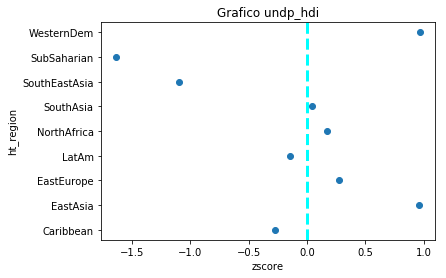

In [20]:
df2=df.dropna()
df2.head(10)
dotplot(df2,"undp_hdi","ht_region",False,"zscore")

# 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad
*El método debe contener los siguientes argumentos:
    ** df1 : Tabla de datos 1.
    ** df2 : Tabla de datos 2.
    ** variable : Variable a contrastar.
    ** log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario
utilizar logaritmos? ¿Por qué?

In [109]:

df2=df.sample(frac=0.5, random_state=1612)
def multiple_graficos(df1,df2,variable,log=False):
    import seaborn as sns
    if log == False:
        p1=sns.kdeplot(df1[variable].dropna(), shade=True, color="r")
        p1=sns.kdeplot(df2[variable].dropna(), shade=True, color="b")
    elif log == True:
        p1=sns.kdeplot(np.log(df1[variable].dropna()), shade=True, color="r")
        p1=sns.kdeplot(np.log(df2[variable].dropna()), shade=True, color="b")
    return p1



# Para todo el análisis la curva en <font color="red">rojo</font> representará el total de datos y la curva <font color="blue">azul</font> el df frac=0.5

## 5.1 Variable "undp_hdi"

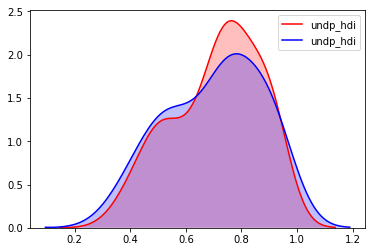

In [111]:
multiple_graficos(df,df2,"undp_hdi",False)

## 5.2 Variable "imf_pop"

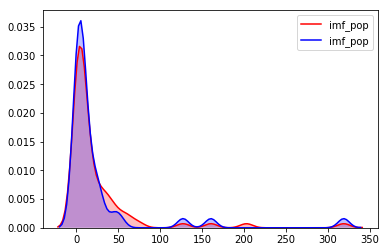

In [113]:
multiple_graficos(df,df2,"imf_pop",False)

## 5.3 Variable "gle_cgdpc"

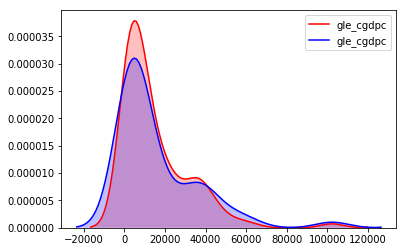

In [108]:
multiple_graficos(df,df2,"gle_cgdpc",False)

### Para los casos visto anteriormente los máximos de la distribucion al dataframe completo aumenta excepto para imf_pop , respecto al promedio no se observa una variacion a considerar para ninguno de los casos anteriores.

## 5.4 ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

### Para asegurarnos de utilizar logaritmo en las distribuciones anteriores, se considera observar la frecuencia desde un histograma las tres variables estudiadas, ya que es una manera sencilla de inspeccionar este comportamiento.

Text(0.5, 1.0, 'Variable undp_hdi')

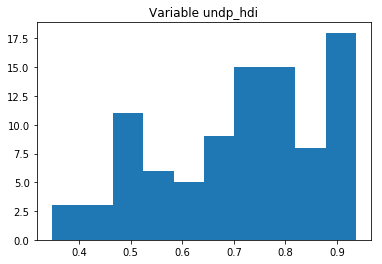

In [67]:
plt.hist(df["undp_hdi"])
plt.title("Variable undp_hdi")

Text(0.5, 0.98, 'Variable imf_pop con Comportamiento Logarítmico a Distribucion Normal')

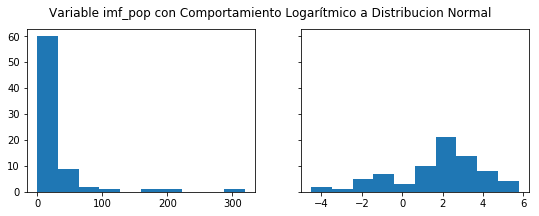

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].hist(df["imf_pop"])
axs[1].hist(np.log(df["imf_pop"]))
fig.suptitle('Variable imf_pop con Comportamiento Logarítmico a Distribucion Normal')

Text(0.5, 0.98, 'Variable imf_pop con Comportamiento Logarítmico a Distribucion Normal')

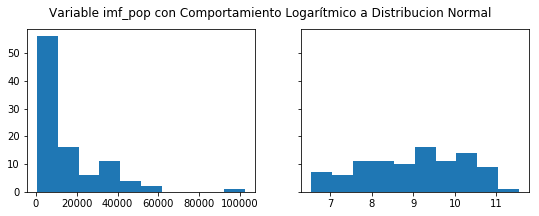

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].hist(df["gle_cgdpc"])
axs[1].hist(np.log(df["gle_cgdpc"]))
fig.suptitle('Variable imf_pop con Comportamiento Logarítmico a Distribucion Normal')

# Resultados

### Básicamente el comportamiento asintótico de los graficos de la izquierda de las variables <font color="red">imf_pop </font> y <font color="red">gle_cgdpc</font>, sugiere una relación logarítmica, puede considerarse este cambio a una distribución normal para un posible estudio donde se puede conseguir una mayor cantidad de inferencias que desde un grafico logarítmico. 
### Forzando el booleando log a True en la función creada único_graficos() podemos considerar esta idea en un futuro estudio de las variables.

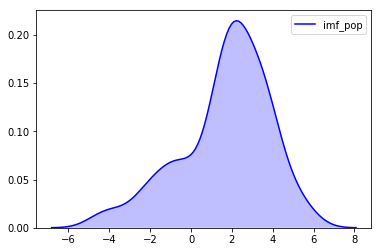

In [125]:
def unico_graficos(df1,variable,log=False):
    import seaborn as sns
    if log == False:
        p1=sns.kdeplot(df1[variable].dropna(), shade=True, color="r")
    elif log == True:
        p1=sns.kdeplot(np.log(df1[variable].dropna()), shade=True, color="blue")
    return p1
unico_graficos(df,"imf_pop",True)

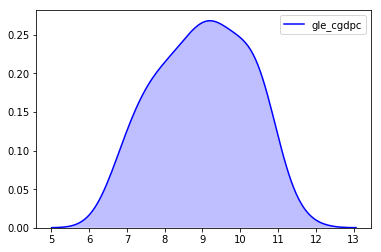

In [124]:
unico_graficos(df,"gle_cgdpc",True)